Dataset = https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

### What is Feature Importance

Feature importance refers to a technique used in machine learning to determine the relative significance of input features in predicting the target variable. It helps identify which features contribute the most to the model's predictions and can provide valuable insights into the underlying relationships within the dataset. Here's a detailed explanation:

1. **Importance of Features**:
   - In many machine learning tasks, datasets contain multiple input features that may vary in their predictive power. Some features might have a strong influence on the target variable, while others might be less relevant or even irrelevant.
   - Understanding the importance of features can help in feature selection, model interpretation, and identifying key factors driving the predictions.

2. **Feature Importance Metrics**:
   - Various metrics are used to quantify the importance of features. Common methods include:
     - **Gini Importance**: Measures the total decrease in node impurity (e.g., Gini impurity) across all decision trees in a Random Forest model.
     - **Permutation Importance**: Measures the decrease in model performance (e.g., accuracy, F1-score) when the values of a feature are randomly shuffled.
     - **Coefficient Magnitudes**: In linear models, the magnitude of the coefficients indicates the importance of features.
     - **Information Gain**: In decision trees, the information gain obtained by splitting on a feature is often used as a measure of its importance.
     - **Tree-based Methods**: In tree-based models like decision trees, Random Forests, or Gradient Boosting Machines (GBM), the importance of features can be inferred directly from the structure of the trees.

3. **Interpretation**:
   - Feature importance scores provide a ranking of features based on their relative influence on the model's predictions. Features with higher importance scores are considered more influential in predicting the target variable.
   - Understanding feature importance can help in:
     - Identifying key drivers of the target variable.
     - Selecting the most relevant features for model training, which can lead to simpler and more interpretable models.
     - Detecting potential data issues or biases if unexpected features have high importance.
     - Explaining and interpreting the model's predictions to stakeholders.

4. **Visualization**:
   - Feature importance can be visualized using various techniques such as bar plots, heatmaps, or tree-based feature importance plots. These visualizations provide a clear understanding of the relative importance of features.

In summary, feature importance is a valuable tool in machine learning for understanding the contribution of input features to the model's predictions. It helps in model interpretation, feature selection, and identifying key factors driving the target variable.

### Feature importance using Random Forest

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('mnist_train.csv')

In [3]:
# Rename the pixel columns
# pixel columns start from 1x1 and go up to 28x28
old_columns = df.columns[1:]  # Exclude the 'label' column
new_columns = ['pixel' + str(i) for i in range(len(old_columns))]
column_mapping = dict(zip(old_columns, new_columns))
df = df.rename(columns=column_mapping)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

<Axes: >

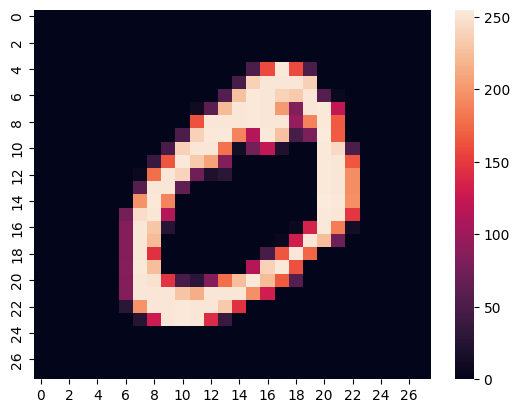

In [7]:
sns.heatmap(X.iloc[1].values.reshape(28,28))

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

In [9]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.12902603e-06, 7.31338595e-07,
       2.46784417e-06, 2.48434416e-06, 3.05522897e-06, 4.21926076e-06,
       3.75117654e-06, 3.53918463e-07, 7.54442458e-06, 4.34261052e-06,
       7.17832366e-06, 1.73880397e-06, 1.74597020e-06, 0.00000000e+00,
       1.33715019e-06, 1.45861403e-06, 0.00000000e+00, 3.69134036e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [10]:
rf.feature_importances_.shape

(784,)

<Axes: >

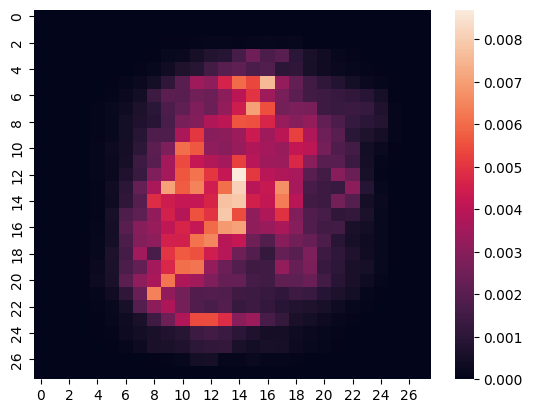

In [11]:
sns.heatmap(rf.feature_importances_.reshape(28,28))

In [ ]:
# It is showing that the middel colored pixels are important

### How feature importance is calculated in Decision Tree

In [15]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [16]:
X,y = make_classification(n_samples=5, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)

In [17]:
clf = DecisionTreeClassifier()

In [18]:
clf.fit(X,y)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'X[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'X[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

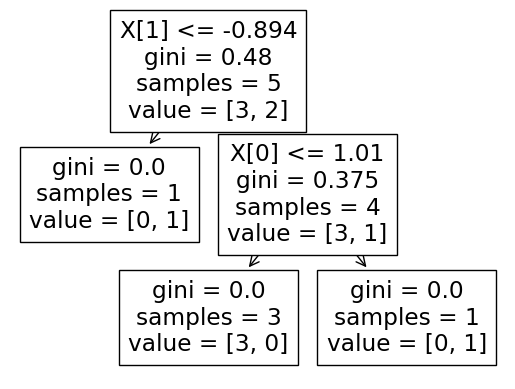

In [21]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [20]:
clf.feature_importances_

array([0.625, 0.375])

In decision trees, feature importance can be calculated based on how much each feature contributes to reducing impurity (or increasing purity) when making decisions at each node in the tree. There are different methods to calculate feature importance, and one common approach is using node importance. Here's how it works:

1. **Node Importance**:
   - Node importance is a measure of how much each feature contributes to reducing impurity (such as Gini impurity or entropy) at each node in the decision tree.
   - For each feature, the importance is calculated by summing the impurity decreases across all nodes where the feature is used for splitting.

2. **Calculation**:
   - When building a decision tree, at each node, the algorithm considers all features and selects the one that maximally reduces impurity when splitting the data.
   - The impurity decrease for a particular feature at a node is calculated by comparing the impurity of the parent node with the weighted sum of impurities of the child nodes after the split.
   - The feature importance for a feature is then calculated by summing the impurity decreases across all nodes where the feature is used for splitting.

3. **Example**:
   - In your code example, you have created a decision tree classifier `clf` using scikit-learn's `DecisionTreeClassifier`.
   - By calling `clf.feature_importances_`, you can retrieve the feature importance scores calculated by the decision tree model.
   - The output `[0.625, 0.375]` indicates the feature importance for the two features in your dataset. For example, the first feature has an importance score of 0.625, while the second feature has an importance score of 0.375.

4. **Interpretation**:
   - Higher feature importance scores indicate that the corresponding features are more influential in making decisions in the decision tree. Features with higher importance are considered more informative for predicting the target variable.

5. **Usage**:
   - Feature importance scores can be used for feature selection, model interpretation, and identifying key factors driving the predictions of the decision tree model.
   - They provide insights into which features are most relevant for predicting the target variable and can guide further analysis or model improvement efforts.

In summary, feature importance in decision trees, calculated using node importance, provides valuable insights into the relative importance of features for making decisions in the model. It helps in understanding the model's behavior and identifying important features for predictive modeling tasks.

**Calculation of feature importances using Decision Tree**

![](node_importantance.jpg)

### How feature importance is calculated in Random Forest


In Random Forest, feature importance is typically calculated based on the mean decrease in impurity (or Gini impurity) for each feature across all decision trees in the ensemble. The feature importance score reflects how much each feature contributes to decreasing impurity when making decisions in the Random Forest model. Here's how it's calculated:

1. **Mean Decrease in Impurity**:
   - At each node of each decision tree in the Random Forest, when selecting the best split, the algorithm considers a subset of features chosen randomly from the full set of features.
   - For each feature, the algorithm measures the decrease in impurity (e.g., Gini impurity or entropy) that results from splitting the data on that feature.
   - The decrease in impurity is calculated as the difference between the impurity of the parent node and the weighted sum of impurities of the child nodes after the split.

2. **Feature Importance**:
   - The feature importance for a feature is then calculated by averaging the decrease in impurity across all decision trees in the Random Forest ensemble.
   - Features with higher average decrease in impurity are considered more important, as they contribute more to improving the model's predictive performance.

3. **Normalization**:
   - In some implementations, the feature importance scores may be normalized to sum up to 1 across all features, providing a relative measure of importance.

4. **Interpretation**:
   - Higher feature importance scores indicate that the corresponding features are more influential in making predictions in the Random Forest model.
   - Feature importance scores can be used for feature selection, model interpretation, and identifying key factors driving the predictions of the Random Forest model.

5. **Usage**:
   - Feature importance scores provide insights into which features are most relevant for predicting the target variable and can guide further analysis or model improvement efforts.
   - They can be visualized and analyzed to understand the relative importance of different features in the dataset.

In summary, feature importance in Random Forest is calculated based on the mean decrease in impurity across all decision trees in the ensemble. It helps in understanding the relative importance of features for predicting the target variable and provides insights into the underlying relationships within the data.